In [1]:
import pandas as pd
import joblib
from sklearn.metrics import f1_score
import numpy as np

In [3]:
X_test = pd.read_csv("../data/preprocessed/X_test.csv")
X_train = pd.read_csv("../data/preprocessed/X_train.csv")
y_test = pd.read_csv("../data/preprocessed/y_test.csv")
y_train = pd.read_csv("../data/preprocessed/y_train.csv")

In [4]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (38288, 28)
X_test shape: (16410, 28)
y_train shape: (38288, 1)
y_test shape: (16410, 1)


## Premier essai

In [38]:
# Trouver l'index médian
median_index = len(X_test) // 2

# Diviser le DataFrame en deux parties
X_test_eval = X_test.iloc[:median_index]
X_test_simul = X_test.iloc[median_index:]

y_test_eval = y_test.iloc[:median_index]
y_test_simul = y_test.iloc[median_index:]

In [39]:
# Evaluation du modèle sur la partie X_test_eval:
rdf = joblib.load("../models/trained_model.joblib")

# Prédiction générale de y
y_pred = rdf.predict(X_test_eval)
y_true = y_test_eval

# Calcul du nouveau F1 score macro average
f1_score_macro_average = f1_score(y_true=y_true, y_pred=y_pred, average="macro")

# Affichage du f1-score:
print("f1-score:",f1_score_macro_average )

f1-score: 0.7389780207707664


In [18]:
for i in X_test_simul.index[]:
    print(i)

8205
8206
8207
8208
8209


In [45]:
X_test_simul.iloc[[0]]

,place,catu,sexe,secu1,year_acc,victim_age,catv,obsm,motor,catr,...,com,agg_,int,atm,col,lat,long,hour,nb_victim,nb_vehicules
8205,10,3,1,0.0,2021,11.0,2.0,1.0,1.0,4,...,6088,2,1,0.0,7.0,43.693826,7.238989,17,2,1


In [41]:
X_test_eval.head(1)

,place,catu,sexe,secu1,year_acc,victim_age,catv,obsm,motor,catr,...,com,agg_,int,atm,col,lat,long,hour,nb_victim,nb_vehicules
0,1,1,1,1.0,2021,25.0,2.0,2.0,1.0,4,...,1053,2,2,1.0,3.0,46.19561,5.22192,22,2,2


In [44]:
X_test_simul.head(1)

,place,catu,sexe,secu1,year_acc,victim_age,catv,obsm,motor,catr,...,com,agg_,int,atm,col,lat,long,hour,nb_victim,nb_vehicules
8205,10,3,1,0.0,2021,11.0,2.0,1.0,1.0,4,...,6088,2,1,0.0,7.0,43.693826,7.238989,17,2,1


In [48]:
df = X_test_eval

In [49]:
df = pd.concat([X_test_eval, X_test_simul.iloc[[0]]], ignore_index=True)

In [50]:
df.head(1)

,place,catu,sexe,secu1,year_acc,victim_age,catv,obsm,motor,catr,...,com,agg_,int,atm,col,lat,long,hour,nb_victim,nb_vehicules
0,1,1,1,1.0,2021,25.0,2.0,2.0,1.0,4,...,1053,2,2,1.0,3.0,46.19561,5.22192,22,2,2


In [52]:
def transfer_row(df1, df2):
    # Prendre la première ligne de df2
    first_row_df2 = df2.iloc[[0]]

    # Supprimer la première ligne de df2
    df2 = df2.iloc[1:]

    # Ajouter la première ligne de df2 à la suite de df1
    df1 =pd.concat([df1, first_row_df2], ignore_index=True)

    # Réinitialiser les index pour éviter les problèmes
    # df1 = df1.reset_index(drop=True)
    # df2 = df2.reset_index(drop=True)

    # Sortie:
    return df1, df2

In [53]:
print("X_test_eval shape:", X_test_eval.shape)
print("X_test_simul shape:", X_test_simul.shape)
print("y_test_eval shape:", y_test_eval.shape)
print("y_test_simul shape:", y_test_simul.shape)

X_test_eval shape: (8205, 28)
X_test_simul shape: (8205, 28)
y_test_eval shape: (8205, 1)
y_test_simul shape: (8205, 1)


In [54]:
X_test_eval, X_test_simul = transfer_row(X_test_eval, X_test_simul)
y_test_eval, y_test_simul = transfer_row(y_test_eval, y_test_simul)

In [55]:
print("X_test_eval shape:", X_test_eval.shape)
print("X_test_simul shape:", X_test_simul.shape)
print("y_test_eval shape:", y_test_eval.shape)
print("y_test_simul shape:", y_test_simul.shape)

X_test_eval shape: (8206, 28)
X_test_simul shape: (8204, 28)
y_test_eval shape: (8206, 1)
y_test_simul shape: (8204, 1)


In [56]:
# Prédiction générale de y
y_pred = rdf.predict(X_test_eval)
y_true = y_test_eval

# Calcul du nouveau F1 score macro average
f1_score_macro_average = f1_score(y_true=y_true, y_pred=y_pred, average="macro")

# Affichage du f1-score:
print("f1-score:",f1_score_macro_average )

f1-score: 0.7388785679711554


In [59]:
# Mise en forme:
# Trouver l'index médian
median_index = len(X_test) // 2

# Diviser le DataFrame en deux parties
X_test_eval = X_test.iloc[:median_index]
X_test_simul = X_test.iloc[median_index:]

y_test_eval = y_test.iloc[:median_index]
y_test_simul = y_test.iloc[median_index:]

f1_score_list = []
N = len(X_test_simul)

for i in range(100):
    X_test_eval, X_test_simul = transfer_row(X_test_eval, X_test_simul)
    y_test_eval, y_test_simul = transfer_row(y_test_eval, y_test_simul)

    # Prédiction générale de y
    y_pred = rdf.predict(X_test_eval)
    y_true = y_test_eval

    # Calcul du nouveau F1 score macro average
    f1_score_new = f1_score(y_true=y_true, y_pred=y_pred, average="macro")

    f1_score_list.append(f1_score_new)


TypeError: 'list' object is not callable

## Deuxième essai

In [13]:
# Trouver l'index médian
median_index = len(X_test) // 2

# Diviser le DataFrame en deux parties
X_test_eval = X_test.iloc[:median_index]
X_test_pool = X_test.iloc[median_index:]

y_test_eval = y_test.iloc[:median_index]
y_test_pool = y_test.iloc[median_index:]

In [14]:
# Evaluation du modèle sur la partie X_test_eval:
rdf = joblib.load("../models/trained_model.joblib")

# Prédiction générale de y
y_pred = rdf.predict(X_test_eval)
y_true = y_test_eval

# Calcul du nouveau F1 score macro average
f1_score_macro_average = f1_score(y_true=y_true, y_pred=y_pred, average="macro")

# Affichage du f1-score:
print("f1-score:",f1_score_macro_average )

f1-score: 0.7389780207707664


In [15]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
print("X_test_eval shape:", X_test_eval.shape)
print("X_test_pool shape:", X_test_pool.shape)
print("y_test_eval shape:", y_test_eval.shape)
print("y_test_pool shape:", y_test_pool.shape)

X_test_eval shape: (8205, 28)
X_test_pool shape: (8205, 28)
y_test_eval shape: (8205, 1)
y_test_pool shape: (8205, 1)


In [10]:
i = 8205
X_line = X_test_pool.loc[[i]]
y_pred_new = rdf.predict(X_line)
y_pred_new

array([0], dtype=int64)

In [17]:
i = 8205
y_test_pool.loc[[i]]

,grav
8205,1


In [11]:
# Transfert d'une ligne:
X_test_eval = pd.concat([X_test_eval, X_test_pool.loc[[i]] ])
y_test_eval = pd.concat([y_test_eval, y_test_pool.loc[[i]] ])

X_test_pool = X_test_pool.drop([i])
y_test_pool = y_test_pool.drop([i])

y_pred = np.concatenate((y_pred, y_pred_new))
y_true = y_test_eval


In [12]:
print("X_test_eval shape:", X_test_eval.shape)
print("X_test_pool shape:", X_test_pool.shape)
print("y_test_eval shape:", y_test_eval.shape)
print("y_test_pool shape:", y_test_pool.shape)

X_test_eval shape: (8206, 28)
X_test_pool shape: (8204, 28)
y_test_eval shape: (8206, 1)
y_test_pool shape: (8204, 1)


In [102]:
# Calcul du nouveau F1 score macro average
f1_score_macro_average = f1_score(y_true=y_true, y_pred=y_pred, average="macro")

# Affichage du f1-score:
print("f1-score:",f1_score_macro_average )

f1-score: 0.7388785679711554


In [114]:
# Trouver l'index médian
median_index = len(X_test) // 2

# Diviser le DataFrame en deux parties
X_test_eval = X_test.iloc[:median_index]
X_test_pool = X_test.iloc[median_index:]

y_test_eval = y_test.iloc[:median_index]
y_test_pool = y_test.iloc[median_index:]

# Evaluation du modèle sur la partie X_test_eval:
rdf = joblib.load("../models/trained_model.joblib")

# Prédiction générale de y
y_pred = rdf.predict(X_test_eval)
y_true = y_test_eval

f1_score_list = []

# Calcul du premier F1 score macro average
f1_score_macro_average = f1_score(y_true=y_true, y_pred=y_pred, average="macro")
f1_score_list.append(f1_score_macro_average)


####
index = X_test_pool.index.tolist()
for i in index:
    X_line = X_test_pool.loc[[i]]
    y_pred_new = rdf.predict(X_line)
    y_pred_new

    # Transfert d'une ligne:
    X_test_eval = pd.concat([X_test_eval, X_test_pool.loc[[i]] ])
    y_test_eval = pd.concat([y_test_eval, y_test_pool.loc[[i]] ])

    X_test_pool = X_test_pool.drop([i])
    y_test_pool = y_test_pool.drop([i])

    y_pred = np.concatenate((y_pred, y_pred_new))
    y_true = y_test_eval

    # Calcul du nouveau F1 score macro average
    f1_score_macro_average = f1_score(y_true=y_true, y_pred=y_pred, average="macro")

    # Affichage du f1-score:
    f1_score_list.append(f1_score_macro_average)

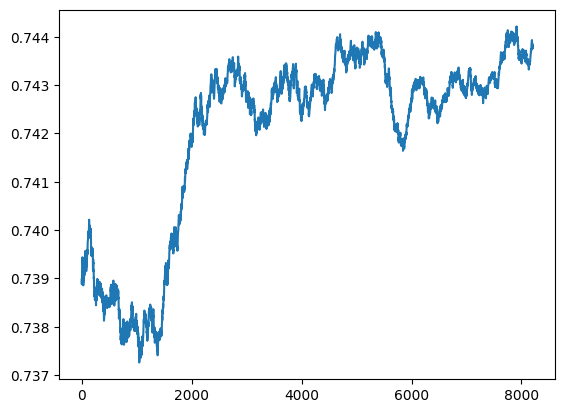

In [115]:
import matplotlib.pyplot as plt
plt.plot(f1_score_list)
plt.show()